<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Exploration-des-notes" data-toc-modified-id="Exploration-des-notes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploration des notes</a></span><ul class="toc-item"><li><span><a href="#Ratings" data-toc-modified-id="Ratings-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Ratings</a></span></li><li><span><a href="#General-Infos" data-toc-modified-id="General-Infos-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>General Infos</a></span></li><li><span><a href="#Cast-du-film" data-toc-modified-id="Cast-du-film-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Cast du film</a></span></li><li><span><a href="#Jointure-" data-toc-modified-id="Jointure--2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Jointure </a></span></li></ul></li><li><span><a href="#Ajout-des-données-scrapées" data-toc-modified-id="Ajout-des-données-scrapées-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ajout des données scrapées</a></span></li></ul></div>

# Imports

In [1]:
import json
import os
import sys
import time
import random
import datetime
from collections import *
import re

from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm, tqdm_pandas
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.cross_validation import cross_val_predict
from sklearn.preprocessing import *

%matplotlib inline

/Users/kamal/datapublica/companies/plugins/project-tools/python/virtualenv/lib/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
tqdm.pandas(desc="progress bar")
pd.set_option("display.max_columns", 100)

In [3]:
sns_palette = sns.color_palette("Blues", n_colors=1)

In [4]:
os.listdir("../data/")

['.DS_Store',
 'cast_data.json',
 'IMDB_FULL_DATA.json',
 'IMDB_SCRAPED_DATA.json',
 'movies_with_cast_data_20171104.csv',
 'name.basics.tsv.gz',
 'tconst_to_worldwide_gross.json',
 'title.basics.tsv.gz',
 'title.principals.tsv.gz',
 'title.ratings.tsv.gz']

# Exploration des notes

## Ratings

In [5]:
df_rating = pd.read_csv("../data/title.ratings.tsv.gz", sep="\t")

In [6]:
df_rating.head()

tconst  averageRating  numVotes
0  tt0000001            5.8      1318
1  tt0000002            6.5       149
2  tt0000003            6.6       896
3  tt0000004            6.4        92
4  tt0000005            6.2      1574

In [7]:
df_rating.shape

(773340, 3)

In [8]:
df_rating.describe()

averageRating      numVotes
count  773340.000000  7.733400e+05
mean        6.940688  9.971763e+02
std         1.396532  1.521873e+04
min         1.000000  5.000000e+00
25%         6.200000  9.000000e+00
50%         7.100000  2.100000e+01
75%         7.900000  7.900000e+01
max        10.000000  1.867401e+06

In [9]:
df_rating["averageRating"] = df_rating["averageRating"].apply(lambda x: round(x, 2))

In [10]:
plt.figure(figsize=(30, 16))
sns.countplot(df_rating["averageRating"], palette=sns_palette)
plt.title("Distribution des notes moyennes de l'ensemble des films", {"fontsize": 20})

In [11]:
plt.figure(figsize=(16, 8))
ax = sns.jointplot(x="averageRating", y="numVotes", data=df_rating[df_rating["numVotes"] > 100000], kind="hex")

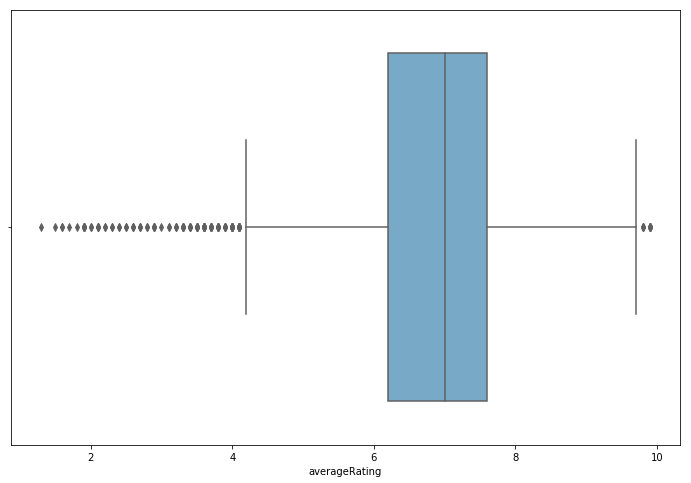

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="averageRating", data=df_rating[df_rating["numVotes"] > 10000], palette=sns_palette)

## General Infos

In [13]:
df_data = pd.read_csv("../data/title.basics.tsv.gz", sep="\t")

In [14]:
df_data.head()

tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              4  Animation,Comedy,Romance  
3       0      1892      \N             \N           Animation,Short  
4       0      1893      \N              1                     Short

In [15]:
df_data.replace("\\N", np.nan, inplace=True)

In [16]:
df_data.shape

(4586439, 9)

In [17]:
df_data_rating = df_data.merge(df_rating, left_on="tconst", right_on="tconst", how="inner")

In [18]:
df_data_rating.head()

tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  \
0       0      1894     NaN              1         Documentary,Short   
1       0      1892     NaN              5           Animation,Short   
2       0      1892     NaN              4  Animation,Comedy,Romance   
3       0      1892     NaN            NaN           Animation,Short   
4       0      1893     NaN              1                     Short   

   averageRating  numVotes  
0            5.8      1318  
1            6.5       149  
2            6.6       896  
3            6.4        92  
4            6.2      1574

In [19]:
df_data_rating.shape

(773340, 11)

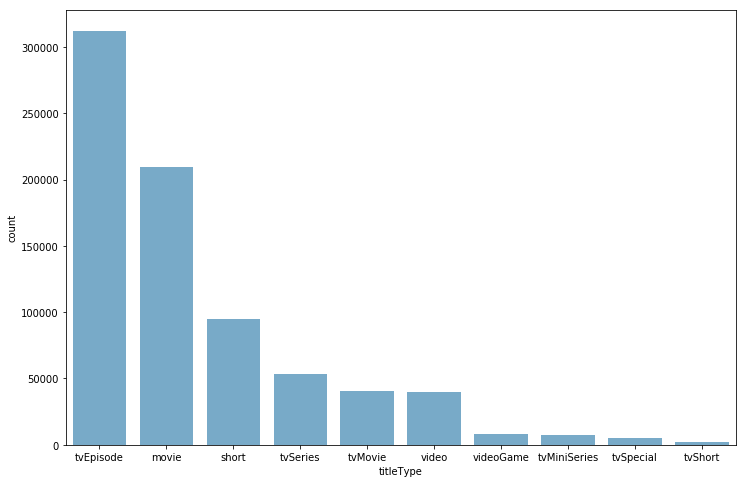

In [20]:
plt.figure(figsize=(12, 8))
sns.countplot(x="titleType", data=df_data_rating, palette=sns_palette, order=df_data_rating.titleType.value_counts().index)

__tvX__ : produit pour la télévision
<br> sinon, produit initialement pour le cinéma </br>
<br> source : http://www.imdb.com/help/show_leaf?titletypes </br>

__Movie__ : film produit pour le cinéma
<br> Short : court-métrages </br>
<br> ==> on ne s'intéresse qu'aux films dont le type est _Movie_  </br>

In [21]:
df_movies = df_data_rating[df_data_rating["titleType"] == "movie"]

In [22]:
movies_set = set(df_movies["tconst"].tolist())

In [23]:
df_movies.shape

(209601, 11)

In [24]:
df_movies["endYear"].value_counts()

Series([], Name: endYear, dtype: int64)

cette colonne n'a aucune donnée
<br> ==> on peut la supprimer </br>

In [25]:
df_movies.rename(columns={"startYear": "productionYear"}, inplace=True) 
del df_movies["endYear"]

In [26]:
df_movies.head()

tconst titleType                   primaryTitle  \
8    tt0000009     movie                     Miss Jerry   
140  tt0000147     movie  The Corbett-Fitzsimmons Fight   
229  tt0000335     movie          Soldiers of the Cross   
327  tt0000574     movie    The Story of the Kelly Gang   
343  tt0000615     movie             Robbery Under Arms   

                     originalTitle isAdult productionYear runtimeMinutes  \
8                       Miss Jerry       0           1894             45   
140  The Corbett-Fitzsimmons Fight       0           1897             20   
229          Soldiers of the Cross       0           1900            NaN   
327    The Story of the Kelly Gang       0           1906             70   
343             Robbery Under Arms       0           1907            NaN   

                     genres  averageRating  numVotes  
8                   Romance            5.4        58  
140  Documentary,News,Sport            5.2       236  
229         Biography,Drama            6.1        31  
327   Biography,Crime,Drama            6.4       416  
343                   Drama            5.1        12

In [27]:
df_movies = df_movies.reset_index()

In [28]:
def transform_genres(row):
    # Séparation des différents genres en colonne
    
    if pd.notnull(row["genres"]):
        genres = row["genres"].split(",")
        for genre in genres:            
            row["is_%s" % genre.lower()] = 1

    return row

In [29]:
df_movies = df_movies.apply(lambda row: transform_genres(row), axis=1)

In [30]:
today = datetime.datetime.today()
def add_age_metadata(x):
    if pd.notnull(x):
        return today.year - int(x)
    

In [31]:
df_movies["age"] = df_movies["productionYear"].apply(lambda x: add_age_metadata(x))

In [32]:
df_movies["runtimeMinutes"] = df_movies["runtimeMinutes"].astype(float)

In [82]:
df_movies.head()

Unnamed: 0    actor_1  actor_1_age       actor_1_name    actor_2  \
0           0  nm0685283          NaN    Arturo Pirovano  nm3942815   
1           1  nm0107631         31.0       Edmund Breon  nm0622772   
2           2  nm0577476         24.0   Georges Melchior  nm0107631   
3           3  nm0917467         39.0       Paul Wegener  nm0332024   
4           4  nm0656034         36.0  Bartolomeo Pagano        NaN   

   actor_2_age      actor_2_name    actor_3  actor_3_age      actor_3_name  \
0          NaN  Pier Delle Vigne  nm0660139          NaN    Salvatore Papa   
1         36.0      René Navarre  nm0577476         24.0  Georges Melchior   
2         31.0      Edmund Breon  nm0622772         36.0      René Navarre   
3         32.0      John Gottowt        NaN          NaN               NaN   
4          NaN               NaN        NaN          NaN               NaN   

  actor_4  actor_4_age actor_4_name actor_5  actor_5_age actor_5_name actor_6  \
0     NaN          NaN          NaN     NaN          NaN          NaN     NaN   
1     NaN          NaN          NaN     NaN          NaN          NaN     NaN   
2     NaN          NaN          NaN     NaN          NaN          NaN     NaN   
3     NaN          NaN          NaN     NaN          NaN          NaN     NaN   
4     NaN          NaN          NaN     NaN          NaN          NaN     NaN   

   actor_6_age actor_6_name actor_7  actor_7_age actor_7_name actor_8  \
0          NaN          NaN     NaN          NaN          NaN     NaN   
1          NaN          NaN     NaN          NaN          NaN     NaN   
2          NaN          NaN     NaN          NaN          NaN     NaN   
3          NaN          NaN     NaN          NaN          NaN     NaN   
4          NaN          NaN     NaN          NaN          NaN     NaN   

   actor_8_age actor_8_name actor_9 actor_9_name  actress_1  actress_1_age  \
0          NaN          NaN     NaN          NaN        NaN            NaN   
1          NaN          NaN     NaN          NaN  nm0137288           38.0   
2          NaN          NaN     NaN          NaN  nm0137288           38.0   
3          NaN          NaN     NaN          NaN  nm0074186           30.0   
4          NaN          NaN     NaN          NaN  nm0021935           24.0   

             actress_1_name  actress_2  actress_2_age   actress_2_name  \
0                       NaN        NaN            NaN              NaN   
1                Renée Carl        NaN            NaN              NaN   
2                Renée Carl        NaN            NaN              NaN   
3              Grete Berger  nm0758802           24.0   Lyda Salmonova   
4  Italia Almirante-Manzini  nm0146028            NaN  Carolina Catena   

   actress_3  actress_3_age  actress_3_name actress_4  actress_4_age  \
0        NaN            NaN             NaN       NaN            NaN   
1        NaN            NaN             NaN       NaN            NaN   
2        NaN            NaN             NaN       NaN            NaN   
3        NaN            NaN             NaN       NaN            NaN   
4  nm0702894           23.0  Lidia Quaranta       NaN            NaN   

  actress_4_name actress_5  actress_5_age actress_5_name actress_6  \
0            NaN       NaN            NaN            NaN       NaN   
1            NaN       NaN            NaN            NaN       NaN   
2            NaN       NaN            NaN            NaN       NaN   
3            NaN       NaN            NaN            NaN       NaN   
4            NaN       NaN            NaN            NaN       NaN   

   actress_6_age actress_6_name actress_7  actress_7_age actress_7_name  \
0            NaN            NaN       NaN            NaN            NaN   
1            NaN            NaN       NaN            NaN            NaN   
2            NaN            NaN       NaN            NaN            NaN   
3            NaN            NaN       NaN            NaN            NaN   
4            NaN            NaN       

In [ ]:
df_movies["tconst"]

In [34]:
plt.figure(figsize=(30, 8))
sns.countplot("averageRating", data=df_movies[df_movies["is_animation"] == 1], palette=sns_palette)

In [35]:
plt.figure(figsize=(30, 8))
sns.countplot("averageRating", data=df_movies[df_movies["is_horror"] == 1], palette=sns_palette)

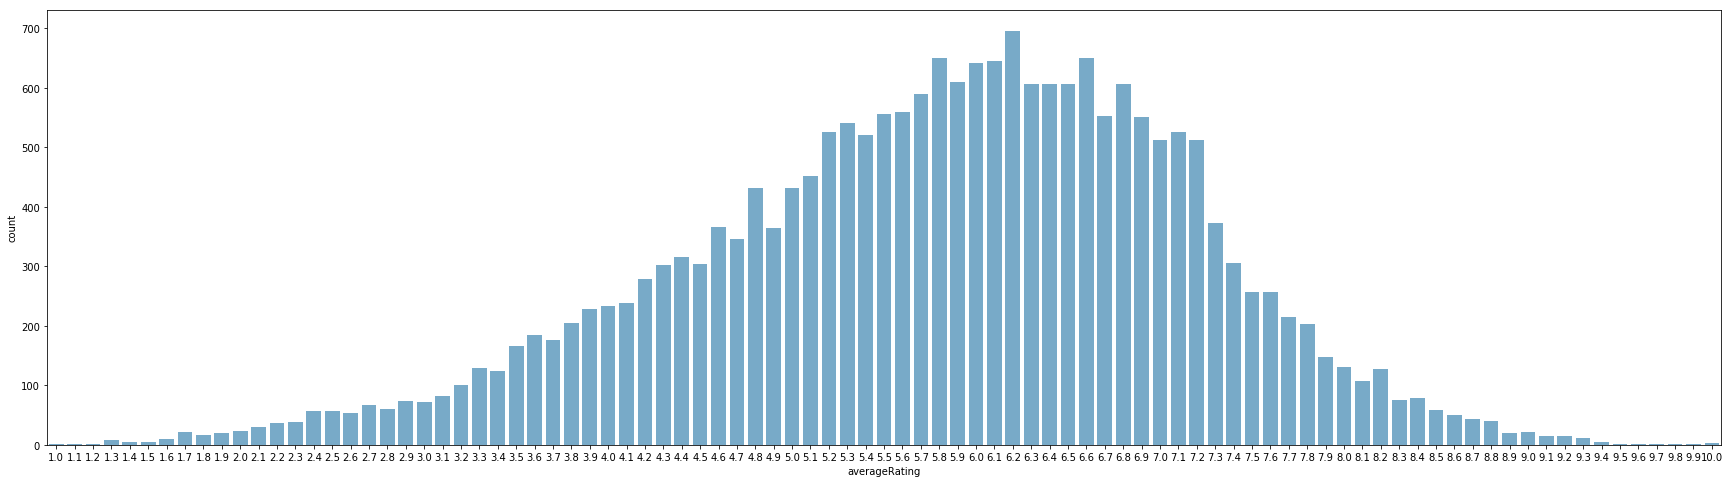

In [36]:
plt.figure(figsize=(30, 8))
sns.countplot("averageRating", data=df_movies[df_movies["is_action"] == 1], palette=sns_palette)

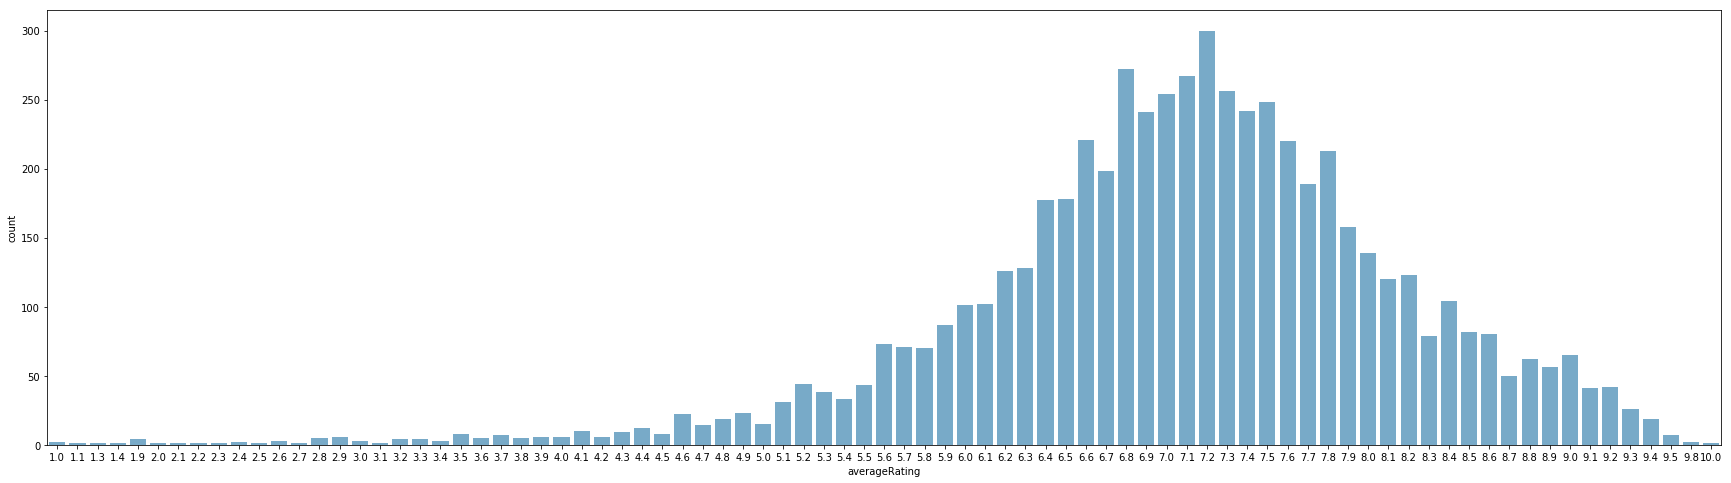

In [37]:
plt.figure(figsize=(30, 8))
sns.countplot("averageRating", data=df_movies[df_movies["is_biography"] == 1], palette=sns_palette)

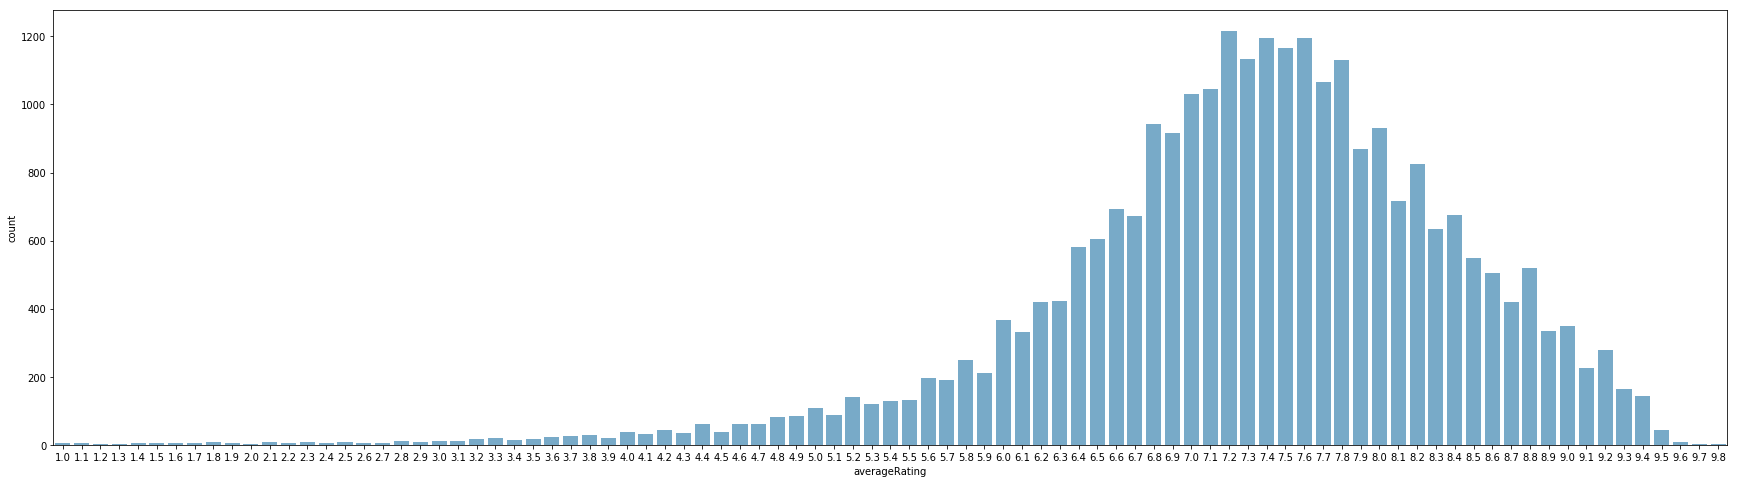

In [38]:
plt.figure(figsize=(30, 8))
sns.countplot("averageRating", data=df_movies[df_movies["is_documentary"] == 1], palette=sns_palette)

## Cast du film

In [39]:
df_principals = pd.read_csv("../data/title.principals.tsv.gz", sep="\t")

In [40]:
df_principals.head()

tconst                            principalCast
0  tt0000001            nm1588970,nm0005690,nm0374658
1  tt0000002                      nm1335271,nm0721526
2  tt0000003  nm5442194,nm5442200,nm1335271,nm0721526
3  tt0000004                      nm0721526,nm1335271
4  tt0000005            nm0653042,nm0443482,nm0005690

In [41]:
df_principals_movies = df_principals[df_principals["tconst"].isin(movies_set)]
df_principals_movies = df_principals_movies.reset_index()

In [42]:
df_name = pd.read_csv("../data/name.basics.tsv.gz", sep="\t")

In [43]:
df_name.head()

nconst      primaryName birthYear deathYear  \
0  nm0000001     Fred Astaire      1899      1987   
1  nm0000002    Lauren Bacall      1924      2014   
2  nm0000003  Brigitte Bardot      1934        \N   
3  nm0000004     John Belushi      1949      1982   
4  nm0000005   Ingmar Bergman      1918      2007   

                primaryProfession                           knownForTitles  
0  soundtrack,actor,miscellaneous  tt0028333,tt0050419,tt0120689,tt0027125  
1              actress,soundtrack  tt0040506,tt0037382,tt0055688,tt0038355  
2     actress,soundtrack,producer  tt0049189,tt0057345,tt0063715,tt0059956  
3         actor,writer,soundtrack  tt0080455,tt0072562,tt0078723,tt0077975  
4           writer,director,actor  tt0060827,tt0050976,tt0083922,tt0050986

In [44]:
df_name.replace("\\N", np.nan, inplace=True)

In [45]:
df_name = df_name[pd.notnull(df_name["knownForTitles"])]

In [46]:
df_name.shape

(7487016, 6)

In [47]:
df_name["nb_titles_known_for"] = df_name["knownForTitles"].apply(lambda x: x.count(",") + 1)

In [48]:
df_professions = pd.DataFrame([item for items in df_name[pd.notnull(df_name["primaryProfession"])].sample(1000)["primaryProfession"].tolist() for item in items.split(",")])

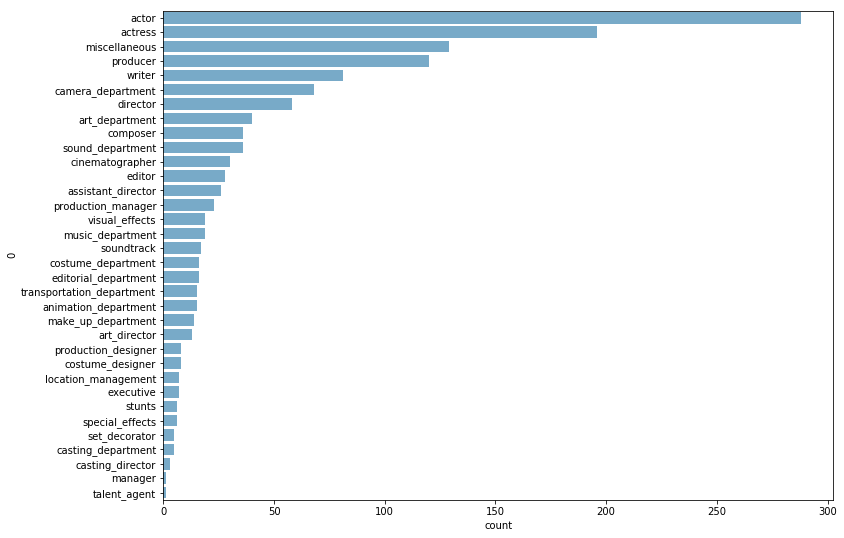

In [49]:
plt.figure(figsize=(12, 9))
sns.countplot(y=df_professions[0], palette=sns_palette, order=df_professions[0].value_counts().index)

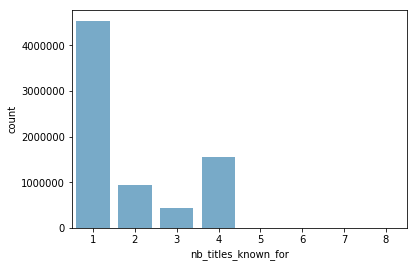

In [50]:
sns.countplot(df_name["nb_titles_known_for"], palette=sns_palette)

==> Il semble ici qu'on a pas l'intégralité de la filmogrpahie des acteurs/réalisateurs.

In [51]:
df_t = df_name.sample(10)

In [52]:
def transform_cast(row):
    casting = row["principalCast"].split(",")
    row["casting_crew"] = len(casting)
    row["casting"] = casting
    return row

In [53]:
df_principals_movies = df_principals_movies.progress_apply(lambda row: transform_cast(row), axis=1)

progress bar: 209227it [04:51, 718.31it/s]                            


In [54]:
df_principals_movies.head()

index     tconst                                      principalCast  \
0      8  tt0000009            nm1309758,nm0063086,nm0085156,nm0183823   
1    144  tt0000147  nm0280615,nm0714557,nm2256592,nm4081458,nm0179...   
2    330  tt0000335  nm1010955,nm1012612,nm0675260,nm0675239,nm0675...   
3    563  tt0000574  nm0675239,nm2421834,nm0846879,nm0846887,nm0425...   
4    602  tt0000615  nm0167619,nm0092809,nm3071427,nm0346387,nm0581...   

   casting_crew                                            casting  
0             4       [nm1309758, nm0063086, nm0085156, nm0183823]  
1             7  [nm0280615, nm0714557, nm2256592, nm4081458, n...  
2             8  [nm1010955, nm1012612, nm0675260, nm0675239, n...  
3            10  [nm0675239, nm2421834, nm0846879, nm0846887, n...  
4             9  [nm0167619, nm0092809, nm3071427, nm0346387, n...

In [55]:
df_name

nconst               primaryName birthYear deathYear  \
0        nm0000001              Fred Astaire      1899      1987   
1        nm0000002             Lauren Bacall      1924      2014   
2        nm0000003           Brigitte Bardot      1934       NaN   
3        nm0000004              John Belushi      1949      1982   
4        nm0000005            Ingmar Bergman      1918      2007   
5        nm0000006            Ingrid Bergman      1915      1982   
6        nm0000007           Humphrey Bogart      1899      1957   
7        nm0000008             Marlon Brando      1924      2004   
8        nm0000009            Richard Burton      1925      1984   
9        nm0000010              James Cagney      1899      1986   
10       nm0000011               Gary Cooper      1901      1961   
11       nm0000012               Bette Davis      1908      1989   
12       nm0000013                 Doris Day      1922       NaN   
13       nm0000014       Olivia de Havilland      1916       NaN   
14       nm0000015                James Dean      1931      1955   
15       nm0000016           Georges Delerue      1925      1992   
16       nm0000017          Marlene Dietrich      1901      1992   
17       nm0000018              Kirk Douglas      1916       NaN   
18       nm0000019          Federico Fellini      1920      1993   
19       nm0000020               Henry Fonda      1905      1982   
20       nm0000021             Joan Fontaine      1917      2013   
21       nm0000022               Clark Gable      1901      1960   
22       nm0000023              Judy Garland      1922      1969   
23       nm0000024              John Gielgud      1904      2000   
24       nm0000025           Jerry Goldsmith      1929      2004   
25       nm0000026                Cary Grant      1904      1986   
26       nm0000027             Alec Guinness      1914      2000   
27       nm0000028             Rita Hayworth      1918      1987   
28       nm0000029         Margaux Hemingway      1954      1996   
29       nm0000030            Audrey Hepburn      1929      1993   
...            ...                       ...       ...       ...   
8202087  nm9359700             Emily Daenzer       NaN       NaN   
8202088  nm9359701            Jason Gilligan       NaN       NaN   
8202089  nm9359702              Naod Haddish       NaN       NaN   
8202090  nm9359703      Jamie Sullivan Mahon       NaN       NaN   
8202091  nm9359704           Lindsey Oblitey       NaN       NaN   
8202092  nm9359705              Adam Reforzo       NaN       NaN   
8202093  nm9359706      Hector Iii Tolentino       NaN       NaN   
8202094  nm9359707                 Tara Tung       NaN       NaN   
8202095  nm9359708                  Cai Wang       NaN       NaN   
8202096  nm9359709           Sken Kaewpadung       NaN       NaN   
8202097  nm9359710  David Corby Tjapaltjarri       NaN       NaN   
8202099  nm9359712     Tim Leura Japaltjarri       NaN       NaN   
8202100  nm9359713            Jon Falkenmire       NaN       NaN   
8202101  nm9359714              Graham Dyson       NaN       NaN   
8202102  nm9359715           John Falkenmyer       NaN       NaN   
8202104  nm9359720             Nathan Taylor       NaN       NaN   
8202105  nm9359721            Russell Howard       NaN       NaN   
8202107  nm9359724           Kaidan Blackmer       NaN       NaN   
8202108  nm9359725            Lorenzo Parros       NaN       NaN   
8202131  nm9359751              Charlie Hall       NaN       NaN   
8202136  nm9359761          Samantha Siewert       NaN       NaN   
8202137  nm9359763               Chase Dodek       NaN       NaN   
8202138  nm9359765            Andrew Grigsby       NaN       NaN   
8202140  nm9359767            Vanessa Alanis       NaN       NaN   
8202141  nm9359768              Chidera Agwu       NaN       NaN   
8202143  nm9359770               Barrie Rose       NaN       NaN   
8202146  nm9359787            Ailsa Galbrath       NaN       NaN   


In [56]:
cast_data = {v["nconst"]: v for v in df_name.to_dict(orient="index").values() if set(v["knownForTitles"].split(",")).intersection(movies_set) }

In [57]:
len(cast_data)

3037052

In [58]:
with open("data/cast_data.json", "w") as f:
    json.dump(cast_data, f)

## Jointure <casting, movie>

In [59]:
df_movies_casting = df_movies.merge(df_principals_movies, how="outer", on="tconst")

In [60]:
def integrate_cast_data(row):
    profession_idx = defaultdict(int)
    if pd.isnull(row["principalCast"]):
        return row
    casting = row["principalCast"].split(",")
    for everyone in casting:
        info = cast_data.get(everyone)
        if not info or pd.isnull(info.get("primaryProfession")):
            continue
        profession = info["primaryProfession"].split(",")[0]
        profession_idx[profession] += 1
        row["%s_%d" % (profession, profession_idx[profession])] = everyone
        row["%s_%d_name" % (profession, profession_idx[profession])] = info["primaryName"]
        if pd.notnull(info.get("birthYear")) and pd.notnull(row["age"]):
            row["%s_%d_age" % (profession, profession_idx[profession])] = int(row["productionYear"]) - int(info["birthYear"])
    return row

In [61]:
df_interesting_movies = df_movies_casting[df_movies_casting["numVotes"] > 1e3]

In [62]:
df_interesting_movies.shape

(25236, 44)

In [63]:
df_interesting_movies = df_interesting_movies.progress_apply(lambda row: integrate_cast_data(row), axis=1)

progress bar: 25237it [06:58, 60.25it/s]                           


In [64]:
df_interesting_movies.reset_index(inplace=True)

In [65]:
df_interesting_movies.to_excel("data/movies_with_cast_data_20171103.xlsx")

# Ajout des données scrapées

In [66]:
cast_data = json.load(open("../data/cast_data.json", "r"))

In [67]:
df_movies = pd.read_csv("../data/movies_with_cast_data_20171104.csv", sep=";")

In [68]:
movie_s3_data = {v["tconst"] : v for k,v in df_movies.to_dict(orient="index").items()}

In [69]:
def explore_object(obj, sample_size=5):
    if isinstance(obj, dict):
        k = random.choice(list(obj.keys()))
        return obj[k]
    elif isinstance(obj, list):
        return random.choice(obj)

In [70]:
imdb_data = json.load(open("../scraped_data_20171113.json", "r"))

In [71]:
type(imdb_data), len(imdb_data)

(list, 24742)

In [72]:
def deserialize(item, attribute="", result={}):
    for key, value in item.items():
        if isinstance(value, dict):
            result = deserialize(value, str(key).upper(), result)
        elif isinstance(value, set) or isinstance(value, list):
            for idx, v in enumerate(list(value)):
                result[key.upper() + "_" + str(idx + 1)] = v 
        else:
            result[attribute + "_" + key.upper()] = value
    return result

In [73]:
r = deserialize(random.choice(imdb_data)["data"], "", {})

In [74]:
interesting_s3_dataset_features=["age","averageRating","composer_1","composer_2","composer_3","composer_4","is_action","is_adult","is_adventure","is_animation","is_biography","is_comedy","is_crime","is_documentary","is_drama","is_family","is_fantasy","is_film-noir","is_game-show","is_history","is_horror","is_music","is_musical","is_mystery","is_news","is_reality-tv","is_romance","is_sci-fi","is_short","is_sport","is_talk-show","is_thriller","is_war","is_western","numVotes","runtimeMinutes"]

In [75]:
imdb_result = {}
for item in tqdm(imdb_data):
    imdb_result[item["movie"]] = deserialize(item["data"], "", {})
    for feature in interesting_s3_dataset_features:
        imdb_result[item["movie"]][feature.upper()] = movie_s3_data[item["movie"]].get(feature)

100%|██████████| 24742/24742 [00:02<00:00, 10318.94it/s]


In [76]:
i = random.choice(list(imdb_result.keys()))

In [77]:
i

'tt0344273'

In [78]:
len(imdb_result[i])

73

In [79]:
imdb_result[i]

{'AGE': 13.0,
 'AVERAGERATING': 7.2,
 'AWARDS_NB_OTHER_NOMINATIONS': 17,
 'AWARDS_NB_OTHER_WINS': 9,
 'CASTING_NM0000366': 15,
 'CASTING_NM0023832': 9,
 'CASTING_NM0091016': 12,
 'CASTING_NM0097730': 3,
 'CASTING_NM0136953': 2,
 'CASTING_NM0222922': 1,
 'CASTING_NM0308041': 5,
 'CASTING_NM0592556': 11,
 'CASTING_NM0705005': 4,
 'CASTING_NM0746085': 13,
 'CASTING_NM0746164': 14,
 'CASTING_NM0767181': 8,
 'CASTING_NM0869567': 10,
 'CASTING_NM1542620': 6,
 'CASTING_NM1769922': 7,
 'COMPOSER_1': 'nm1055564',
 'COMPOSER_2': 'nm4739087',
 'COMPOSER_3': nan,
 'COMPOSER_4': nan,
 'COUNTRIES_1': 'France',
 'CRITICS_CRITIC': '63',
 'CRITICS_USER': '19',
 'DETAILS_GROSS': '$289,592',
 'DETAILS_RELEASE_DATE': '22 December 2004 (France)',
 'DIRECTOR_1': 'nm0221611',
 'IS_ACTION': nan,
 'IS_ADULT': nan,
 'IS_ADVENTURE': nan,
 'IS_ANIMATION': nan,
 'IS_BIOGRAPHY': nan,
 'IS_COMEDY': 1.0,
 'IS_CRIME': nan,
 'IS_DOCUMENTARY': nan,
 'IS_DRAMA': 1.0,
 'IS_FAMILY': nan,
 'IS_FANTASY': nan,
 'IS_FILM-NOIR'

In [80]:
imdb_result["tt0004972"]

{'AGE': 102.0,
 'AVERAGERATING': 6.7,
 'AWARDS_NB_OTHER_WINS': 2,
 'CASTING_NM0001273': 1,
 'CASTING_NM0014894': 14,
 'CASTING_NM0017488': 5,
 'CASTING_NM0073239': 15,
 'CASTING_NM0166730': 12,
 'CASTING_NM0178270': 4,
 'CASTING_NM0189684': 13,
 'CASTING_NM0366008': 9,
 'CASTING_NM0376221': 11,
 'CASTING_NM0507635': 6,
 'CASTING_NM0519227': 8,
 'CASTING_NM0550615': 2,
 'CASTING_NM0717468': 10,
 'CASTING_NM0797094': 7,
 'CASTING_NM0910400': 3,
 'COMPOSER_1': nan,
 'COMPOSER_2': nan,
 'COMPOSER_3': nan,
 'COMPOSER_4': nan,
 'COUNTRIES_1': 'USA',
 'CRITICS_CRITIC': '84',
 'CRITICS_USER': '334',
 'DETAILS_BUDGET': '$100,000',
 'DETAILS_GROSS': '$10,000,000',
 'DETAILS_RELEASE_DATE': '21 March 1915 (USA)',
 'DIRECTOR_1': 'nm0000428',
 'IS_ACTION': nan,
 'IS_ADULT': nan,
 'IS_ADVENTURE': nan,
 'IS_ANIMATION': nan,
 'IS_BIOGRAPHY': nan,
 'IS_COMEDY': nan,
 'IS_CRIME': nan,
 'IS_DOCUMENTARY': nan,
 'IS_DRAMA': 1.0,
 'IS_FAMILY': nan,
 'IS_FANTASY': nan,
 'IS_FILM-NOIR': nan,
 'IS_GAME-SHOW': n

In [81]:
with open("../data/IMDB_FULL_DATA.json", "w") as f:
    json.dump(imdb_result, f)